In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

import matplotlib
matplotlib.__version__

'3.7.1'

In [10]:
# function to minimise
def my_fun(x):
    return -((6*x -12)**2 - 2) / (2**(abs(6*x-13)))

In [11]:
# checking if new position has better value and withing range [0,4]
def fitter(n, m):
    return n >= 0 and n <= 4 and my_fun(n) < my_fun(m)


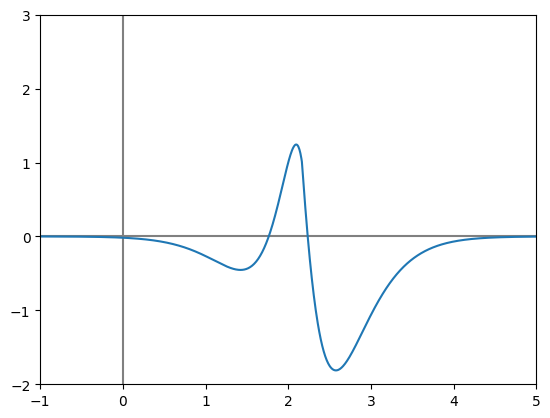

In [12]:
#fig initialisation
x = np.linspace(-1, 5, 1000)
y = my_fun(x)

fig = plt.figure()
ax = fig.add_subplot(xlim=(-1, 5), ylim=(-2, 3))
ax.axvline(color="grey")
ax.axhline(color="grey")
ax.plot(x,y)

#variables for the various elements of the figure
p1, = ax.plot([],[], 'ko', lw=2) #current point with value
p2, = ax.plot([],[], 'go', lw=2) #new and better point with value
p3, = ax.plot([],[], 'ro', lw=2) #new but worse point with value
line1, = ax.plot([],[], ',-', c='orange', lw=1.5) # line from current point to value
line2, = ax.plot([],[], ',-', c='orange', lw=1.5) # line from new point to value
text = ax.text(0.18, 0.9, '', transform=ax.transAxes) # printing current best point and value

rng=np.random.default_rng()

In [17]:
#es algorithm
niterations=200

current_point=0
mutations=[[current_point]]

# generation of all the r vectors from the beginning
# mean 0 - variance 0.5
rs=rng.normal(0,.5,niterations-1)

# a couple of variables to get some stats
changes=0
last_change=0

for i in range(0,niterations-1):
    new_point=current_point + rs[i]
    mutations.append([current_point, new_point]) # to update the figure
    if(fitter(new_point,current_point)):
        last_change=i
        changes += 1
        current_point=new_point

print('Best={0}, after {1} moves and {2} iterations'.format(current_point,changes, last_change))

Best=2.571561731754494, after 12 moves and 69 iterations


In [14]:
# a bunch of code for the animation
def init():
    p1.set_data([], [])
    p2.set_data([], [])
    p3.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    text.set_text('Current best: {0}\nValue: {1}'.format(0,my_fun(0)))
    return text, line1, line2, p1, p2, p3,

def animate(i):
    if(i!=0):
        point1=[mutations[i][0], my_fun(mutations[i][0])]
        point2=[mutations[i][1], my_fun(mutations[i][1])]

        xs1 = [point1[0] for i in range (0,50)]
        ys1 = np.linspace(point1[1], 0, 50)

        line1.set_data(xs1,ys1)

        xs2 = [point2[0] for i in range (0,50)]
        ys2 = np.linspace(point2[1], 0, 50)

        line2.set_data(xs2,ys2)

        p1.set_data([point1[0], point1[0]], [0, point1[1]])

        p2.set_data([],[])
        p3.set_data([],[])
        if fitter(point2[0],point1[0]):
            p2.set_data([point2[0], point2[0]],[0, point2[1]])
        else:
            p3.set_data([point2[0], point2[0]],[0, point2[1]])

        text.set_text('Current best: {0}\nValue: {1}'.format(point1[0],point1[1]))

    else:
        point=[mutations[i][0], my_fun(mutations[i][0])]

        ys = np.linspace(point[1], 0, 50)
        xs = [point[0] for i in range(0,50)]

        line1.set_data(xs,ys)

        p1.set_data([point[0], point[0]], [0, point[1]])

        text.set_text('Current best: {0}\nValue: {1}'.format(point[0],point[1]))
    return text, line1, line2, p1, p2, p3,

anim = FuncAnimation(fig, animate, init_func=init, frames=niterations, interval=500, blit=True, repeat=False)

plt.show()

# New section

In [22]:
anim.save('1D_es_example.gif', writer='imagemagick')